In [36]:
import unidip
import numpy as np
import seaborn as sns

In [162]:
dimensionality=2
default_cov = np.identity(dimensionality)*0.001
def create_multimodal_dataset(K=1,points_per_center=10,cov=default_cov):
    centers = np.random.uniform(-1,1,(K,dimensionality))
    points = []
    for k in range(K):
        c = centers[k,:]
        #print(f"center {k}: {c}")
        curr_points = np.random.multivariate_normal(c,cov,size=points_per_center)
        points.append(curr_points)
        
    points_npa = np.vstack(points)
    return centers, points_npa



dimensionality 2


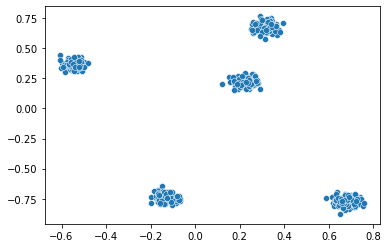

In [163]:
centers, points_npa = create_multimodal_dataset(K=5,points_per_center=100)
if dimensionality == 1:
    print("single dimensionality")
    sns.scatterplot(x=range(len(points_npa)),y=np.sort(points_npa[:,0]))
else:
    print(f"dimensionality {dimensionality}")
    sns.scatterplot(x=points_npa[:,0],y=points_npa[:,1])

In [164]:
def calculate_distances(points_npa):
    center = np.mean(points_npa,0)
    distances = np.sqrt(np.sum((points_npa - center)**2,axis=1))
    return distances

/home/frablum/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

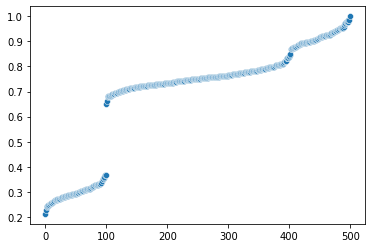

In [165]:
distances = calculate_distances(points_npa)
sns.scatterplot(range(distances.shape[0]),np.sort(distances))

In [156]:
unidip.dip.diptst(distances)

(0.04869927483462663, 0.000999000999000999, (211, 476))

In [157]:
intervals = unidip.UniDip(distances, alpha=0.001, ntrials=1000, mrg_dst=1).run()
print(intervals)

[(14, 190), (211, 475)]


In [ ]:
for k in range(1,100):
    centers, points_npa = create_multimodal_dataset(K=k,points_per_center=100)
    unidip.dip.diptst(distances)
    distances = calculate_distances(points_npa)
    intervals_0 = unidip.UniDip(distances, alpha=0.001, ntrials=1000, mrg_dst=0).run()
    intervals_1 = unidip.UniDip(distances, alpha=0.001, ntrials=1000, mrg_dst=1).run()
    print(k,unidip.dip.diptst(distances),len(intervals_0),len(intervals_1))


1 (0.033422755083135136, 0.6123876123876124, (47, 57)) 1 1
2 (0.018321812374435975, 0.954045954045954, (61, 80)) 1 1
3 (0.11335773594010412, 0.000999000999000999, (13, 195)) 2 2
4 (0.1503820011063191, 0.000999000999000999, (203, 398)) 3 3
5 (0.04894267846651573, 0.000999000999000999, (25, 378)) 4 3
6 (0.0642463760695336, 0.000999000999000999, (123, 364)) 5 5
7 (0.06344742038236267, 0.000999000999000999, (16, 382)) 4 4
8 (0.07209509385956964, 0.000999000999000999, (11, 391)) 3 3
9 (0.02351588187230902, 0.001998001998001998, (54, 350)) 1 1
10 (0.05657431207027547, 0.000999000999000999, (314, 675)) 8 8
11 (0.030773908478179138, 0.000999000999000999, (346, 930)) 3 5
12 (0.05543387356237467, 0.000999000999000999, (126, 572)) 7 6
13 (0.02914409174541316, 0.000999000999000999, (409, 663)) 3 3
14 (0.04108001401561645, 0.000999000999000999, (426, 982)) 7 8
15 (0.018529392764705103, 0.002997002997002997, (645, 1410)) 1 1
16 (0.030626790360612388, 0.000999000999000999, (121, 456)) 3 3
17 (0.03280

In [173]:
import sys
import os
sys.path.append(
    os.path.abspath(
        os.path.dirname(
            # apparently in jupyter the variable __file__ is not defined
            os.path.abspath(os.path.realpath("__file__")) 
        )+"/.."
    )
)
from common import persistency
from common import relspecs

In [175]:
tsets = persistency.load_tsets(relspecs.activity)
activity_data = np.vstack([tsets.train,tsets.test])


tsets creation time: 2021-12-14 07:02:34.783778
divided: [(2700, 20), (2700, 181), (2700, 188), (2700, 1), (2700, 6), (2700, 7), (2700, 10), (2700, 67), (2700, 3)]
scaling field <F:iati_identifier n_features:20> section.shape: (2700, 20)
resulting section_scaled.shape: (2700, 20)
scaling field <F:default_lang n_features:181> section.shape: (2700, 181)
resulting section_scaled.shape: (2700, 181)
scaling field <F:default_currency n_features:188> section.shape: (2700, 188)
resulting section_scaled.shape: (2700, 188)
scaling field <F:humanitarian n_features:1> section.shape: (2700, 1)
resulting section_scaled.shape: (2700, 1)
scaling field <F:activity_status_code n_features:6> section.shape: (2700, 6)
resulting section_scaled.shape: (2700, 6)
scaling field <F:collaboration_type_code n_features:7> section.shape: (2700, 7)
resulting section_scaled.shape: (2700, 7)
scaling field <F:default_flow_type n_features:10> section.shape: (2700, 10)
resulting section_scaled.shape: (2700, 10)
scaling fi

In [176]:
activity_distances = calculate_distances(activity_data)
activity_intervals = unidip.UniDip(activity_distances, alpha=0.001, ntrials=1000, mrg_dst=1).run()
print(k,unidip.dip.diptst(activity_distances),len(activity_intervals))


19 (0.17847595959343016, 0.000999000999000999, (1220, 2540)) 8


<AxesSubplot:>

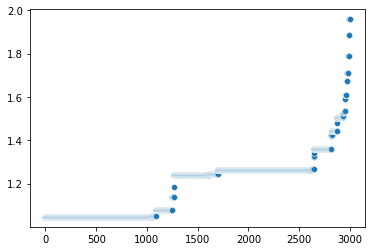

In [179]:
sns.scatterplot(x=range(len(activity_distances)), y=sorted(activity_distances))